In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from time import perf_counter

# Regression Models Lab
## Linear and logistic regression: theory and practice

In this lab you'll revisit and expand on your knowledge of modelling in general, as well as the fundamentals of linear and logistic regression. As a reminder, _linear regression_ is a regression model (regressor), and _logistic regression_ is a classification model (classifier).

This time, you'll use generated data, in order to separate some of the complexity of handling various datasets from inspecting and evaluating models.

**Use vectorization as much as possible!** You should be able to complete the lab using for-loops only to track the training steps.

### Problem 1. Generate some data for multiple linear regression (1 point)
As an expansion to the lecture, you'll create a dataset and a model.

Create a dataset of some (e.g., 50-500) observations of several (e.g., 5-20) independent features. You can use random generators for them; think about what distributions you'd like to use. Let's call them $x_1, x_2, ..., x_m$. The data matrix $X$ you should get should be of size $n \times m$. It's best if all features have different ranges.

Create the dependent variable by assigning coefficients $\bar{a_1}, \bar{a_2}, ..., \bar{a_m}, \bar{b}$ and calculating $y$ as a linear combination of the input features. Add some random noise to the functional values. I've used bars over coefficients to avoid confusion with the model parameters later.

Save the dataset ($X$ and $y$), and "forget" that the coefficients have ever existed. "All" you have is the file and the implicit assumption that there is a linear relationship between $X$ and $y$.

#### Data Generation for Multiple Linear Regression

##### Approach

1. **Choosing dimensions**  
   - Number of observations: e.g. \( n = 200 \)  
   - Number of features: e.g. \( p = 10 \)  
   - Data matrix \( $X $\) will have shape \( (200, 10) \).

2. **Features generation\( $X $\)**  
   Each column should come from a different distribution/range:  
   - Uniform(0, 10)  
   - Normal(0, 1)  
   - Exponential(λ=1)  
   - Integers between 0 and 100  
   - Uniform(50, 100)  
   - Normal(10, 5)  
   - Chi-square(2)  
   - Beta(2, 5) scaled  
   - Binomial(10, 0.3)  
   - Poisson(5)  

3. **Assign coefficients \( $\bar{\beta}$ \)**  
   Choose a random vector of coefficients of length \($ p $\).  

4. **Generate target variable \( y \)**  
   $$
   y = X \bar{\beta} + \epsilon
   $$  
   where \( $\epsilon \sim \mathcal{N}(0, \sigma^2)$ \) adds Gaussian noise.  

5. **Save the dataset**  
   Save both \($ X $\) and \( $y $\) to a CSV file so that later you “forget” the true coefficients. 

In [6]:
# Set dimensions
n, p = 200, 10   # 200 observations, 10 features

# Generate features with different distributions/ranges
np.random.seed(42)  # reproducibility
X = np.column_stack([
    np.random.uniform(0, 10, n),         # Uniform(0,10)
    np.random.normal(0, 1, n),           # Normal(0,1)
    np.random.exponential(1, n),         # Exponential
    np.random.randint(0, 100, n),        # Random integers
    np.random.uniform(50, 100, n),       # Uniform(50,100)
    np.random.normal(10, 5, n),          # Normal(mean=10, std=5)
    np.random.chisquare(df=2, size=n),   # Chi-square
    np.random.beta(2, 5, n) * 20,        # Beta scaled
    np.random.binomial(10, 0.3, n),      # Binomial
    np.random.poisson(5, n)              # Poisson
])

# True coefficients (hidden later)
beta_true = np.random.uniform(1, 5, p)  # coefficients between 1 and 5

# Generate y with noise
noise = np.random.normal(0, 5, n)  # Gaussian noise
y = X @ beta_true + noise

# Save dataset
df = pd.DataFrame(X, columns=[f"x{i+1}" for i in range(p)])
df["y"] = y
df.to_csv("linear_regression_dataset.csv", index=False)

print("Dataset generated and saved as 'linear_regression_dataset.csv'")
print(df.head())

Dataset generated and saved as 'linear_regression_dataset.csv'
         x1        x2        x3    x4         x5         x6        x7  \
0  3.745401 -0.680025  0.552033  33.0  74.317874  11.417790  1.634759   
1  9.507143  0.232254  2.368238   7.0  70.447759   8.596920  0.511179   
2  7.319939  0.293072  0.117880  39.0  88.594099  11.872926  0.350673   
3  5.986585 -0.714351  0.678505  82.0  50.610154   4.755858  2.108346   
4  1.560186  1.865775  0.011419  41.0  79.922135  -0.596787  0.788829   

         x8   x9  x10           y  
0  6.859577  2.0  2.0  452.153842  
1  0.654020  2.0  4.0  378.545758  
2  8.636450  3.0  5.0  546.768622  
3  5.398510  4.0  4.0  486.540192  
4  8.331381  3.0  3.0  485.528074  


### Problem 2. Check your assumption (1 point)
Read the dataset you just saved (this is just to simulate starting a new project). It's a good idea to test and verify our assumptions. Find a way to check whether there really is a linear relationship between the features and output.

#### Task 2: Reload Dataset & Test for Linearity

#### To tackle the problem I will follow steps bellow

1. **Load dataset**  
   Import the CSV file we created earlier.

2. **Explore the data**  
   - Look at summary statistics and head of the DataFrame.  
   - Check distributions of features and target variable.  

3. **Check linear relationships**  
   Several approaches can be used:
   - **Correlation analysis**: Compute Pearson correlations between each feature and \( y \). A high (positive or negative) correlation suggests linear dependence.  
   - **Scatterplots**: Plot each feature against \( y \) to visually inspect linear trends.  
   - **Heatmap**: Visualize correlations in a compact form.  
   - **Simple regressions**: Fit one-variable regressions and check R² values. 

         x1        x2        x3    x4         x5         x6        x7  \
0  3.745401 -0.680025  0.552033  33.0  74.317874  11.417790  1.634759   
1  9.507143  0.232254  2.368238   7.0  70.447759   8.596920  0.511179   
2  7.319939  0.293072  0.117880  39.0  88.594099  11.872926  0.350673   
3  5.986585 -0.714351  0.678505  82.0  50.610154   4.755858  2.108346   
4  1.560186  1.865775  0.011419  41.0  79.922135  -0.596787  0.788829   

         x8   x9  x10           y  
0  6.859577  2.0  2.0  452.153842  
1  0.654020  2.0  4.0  378.545758  
2  8.636450  3.0  5.0  546.768622  
3  5.398510  4.0  4.0  486.540192  
4  8.331381  3.0  3.0  485.528074  

=== Summary Statistics ===
           x1      x2      x3      x4      x5      x6      x7      x8      x9  \
count  200.00  200.00  200.00  200.00  200.00  200.00  200.00  200.00  200.00   
mean     4.84    0.07    1.05   46.32   75.89   10.08    1.90    5.78    3.00   
std      2.95    0.97    1.16   29.16   13.84    4.81    1.84    3.22    1

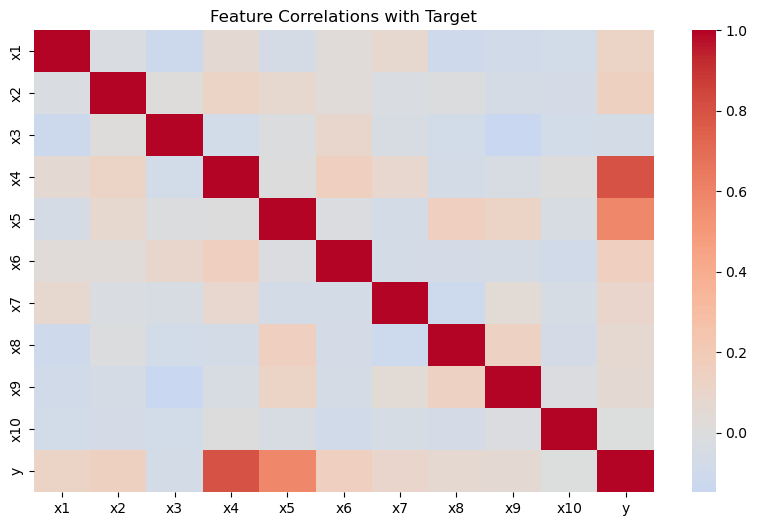

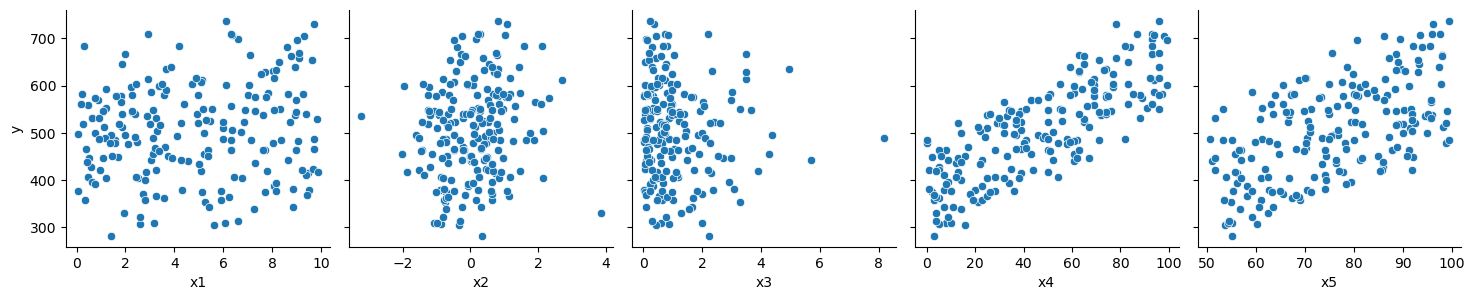

In [9]:
# Load dataset
df = pd.read_csv("linear_regression_dataset.csv")
print(df.head())

# Basic statistics
print("\n=== Summary Statistics ===")
print(df.describe().round(2))

# Correlation with target
corr = df.corr(numeric_only=True)
print("\n=== Correlation with y ===")
print(corr["y"].sort_values(ascending=False))

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Feature Correlations with Target")
plt.show()

# Scatterplots for first few features
sns.pairplot(df, x_vars=["x1", "x2", "x3", "x4", "x5"], y_vars="y", height=3)
plt.show()

#### Summary Statistics and Analysis
- The dataset contains **200 observations** with 10 features.  
- Features are on different scales (e.g., `x2` centered near 0, `x4` ranging from 0 to ~100, `x5` between ~50–100).  
- The target variable \( y \) has a mean of ~505 with standard deviation ~100.  

This confirms that the dataset is heterogeneous and realistic for regression.

#### Correlation Analysis
Pearson correlations between each feature and the target variable \( y \):

| Feature | Correlation with \( y \) |
|---------|--------------------------|
| **x4**  | **0.80** |
| **x5**  | **0.58** |
| x6      | 0.16 |
| x2      | 0.16 |
| x1      | 0.12 |
| x7      | 0.10 |
| x8      | 0.07 |
| x9      | 0.06 |
| x10     | ~0.00 |
| x3      | -0.07 |

##### 3. Interpretation
- **x4 and x5** show **strong positive correlations** with the target variable, suggesting a clear linear contribution.  
- Features like **x6, x2, x1** have weaker correlations but may still be important when combined with others in a multivariate model.  
- **x10** has essentially no correlation, and **x3** is weakly negative, suggesting limited linear effect.  
- The heatmap and scatterplots visually confirmed that at least some features have clear linear trends with \( y \).  

**Conclusion**:  
There is **strong evidence of linear relationships** between several features (`x4`, `x5`, and to a lesser extent `x6`, `x2`) and the target variable. This supports the assumption that a linear regression model is appropriate for this dataset.

### Problem 3. Figure out the modelling function (1 point)
The modelling function for linear regression is of the form
$$ \tilde{y} = \sum_{i=1}^{m}a_i x_i + b $$

If you want to be clever, you can find a way to represent $b$ in the same way as the other coefficients.

Write a Python function which accepts coefficients and data, and ensure (test) it works correctly.

The linear regression model assumes a relationship of the form:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p
$$

where  
- \( $\beta_0$ \) = intercept (bias term),  
- \( $\beta_1, \dots, \beta_p$ \) = coefficients for each feature,  
- \( $x_1, \dots, x_p$ \) = input features.

#### Representing the Intercept
To make the intercept look like all other coefficients, we can **augment the data matrix \( X \)** with an extra column of ones:

$$
X' =
\begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1p} \\
1 & x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix}
$$

Then the model becomes simply:

$$
y = X' \beta
$$

where \( $\beta = [\beta_0, \beta_1, \dots, \beta_p]^T$ \).

In [14]:
def linear_model(X, beta):
    """
    Compute predictions y = X' @ beta
    where X is (n, p), beta is (p+1,)
    
    X: feature matrix of shape (n, p)
    beta: coefficient vector including intercept (length p+1)
    """
    # Add column of ones for intercept
    X_aug = np.column_stack([np.ones(X.shape[0]), X])
    return X_aug @ beta

# --- Test the function ---
# Small test dataset
X_test = np.array([[1, 2],
                   [3, 4],
                   [5, 6]])  # shape (3,2)

beta_test = np.array([10, 2, 3]) 
# This means: y = 10 + 2*x1 + 3*x2

y_pred = linear_model(X_test, beta_test)
print("Test predictions:", y_pred)

Test predictions: [18. 28. 38.]


### Problem 4. Write the cost function and compute its gradients (1 point)
Use MSE as the cost function $J$. Find a way to compute, calculate, or derive its gradients w.r.t. the model parameters $a_1, ..., a_m, b$

Note that computing the cost function value and its gradients are two separate operations. Quick reminder: use vectorization to compute all gradients (maybe with the exception of $\frac{\partial J}{\partial b}$) at the same time.

#### Task 4: Cost Function (MSE) and Its Gradients

We use **Mean Squared Error (MSE)** as the cost function for linear regression.  

$$
X' = \begin{bmatrix} \mathbf{1} & X \end{bmatrix} \in \mathbb{R}^{n \times (p+1)}.
$$
Predictions: \($\hat{y} = X' \beta$\). Residuals: \($r = \hat{y} - y\$).

##### Cost (MSE)
$$
J(\beta) \;=\; \frac{1}{n}\,\|\,y - X'\beta\,\|_2^2
\;=\; \frac{1}{n}\, r^\top r
$$

##### Gradient w.r.t. \(\beta\)
Using vector calculus,
$$
\nabla_\beta J(\beta)
= \frac{2}{n}\, (X')^\top \big(X'\beta - y\big)
= \frac{2}{n}\, (X')^\top r.
$$

> This single vectorized expression covers **all** parameters simultaneously, including the intercept (its column in \(X'\) is the ones vector).

In [17]:
def augment_X_with_ones(X: np.ndarray) -> np.ndarray:
    """Add intercept column: X' = [1, X]."""
    return np.column_stack([np.ones(X.shape[0]), X])

def mse_cost(X: np.ndarray, beta: np.ndarray, y: np.ndarray) -> float:
    """
    Mean Squared Error:
    J(beta) = (1/n) * || y - X' @ beta ||^2
    X: (n, p), beta: (p+1,), y: (n,)
    """
    X_aug = augment_X_with_ones(X)
    residuals = X_aug @ beta - y
    n = X_aug.shape[0]
    return (residuals @ residuals) / n

def mse_grad(X: np.ndarray, beta: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Gradient of MSE w.r.t. beta:
    grad = (2/n) * X'^T * (X' @ beta - y)
    Returns shape (p+1,)
    """
    X_aug = augment_X_with_ones(X)
    residuals = X_aug @ beta - y
    n = X_aug.shape[0]
    return (2.0 / n) * (X_aug.T @ residuals)

In [18]:
# Synthetic small test
np.random.seed(0)
n, p = 5, 3
X_test = np.random.randn(n, p)
beta_test = np.random.randn(p + 1)
y_test = np.random.randn(n)

# Analytical gradient
g_analytical = mse_grad(X_test, beta_test, y_test)

# Finite-difference gradient
eps = 1e-6
g_numeric = np.zeros_like(beta_test)
for j in range(len(beta_test)):
    e = np.zeros_like(beta_test); e[j] = eps
    j_plus  = mse_cost(X_test, beta_test + e, y_test)
    j_minus = mse_cost(X_test, beta_test - e, y_test)
    g_numeric[j] = (j_plus - j_minus) / (2 * eps)

print("Analytical grad:", np.round(g_analytical, 6))
print("Numeric grad   :", np.round(g_numeric, 6))
print("Max |diff|     :", float(np.max(np.abs(g_analytical - g_numeric))))


Analytical grad: [5.410793 9.036266 4.866659 0.080357]
Numeric grad   : [5.410793 9.036266 4.866659 0.080357]
Max |diff|     : 1.0518217408161945e-09


### Problem 5. Perform gradient descent (1 point)
Perform weight updates iteratively. Find a useful criterion for stopping. For most cases, just using a fixed (large) number of steps is enough.

You'll need to set a starting point (think about which one should be good, and how it matters); and a learning rate.

We minimize the MSE cost from Task 4 by **iterative updates**:
$$
\beta^{(t+1)} \;=\; \beta^{(t)} \;-\; \eta \,\nabla_\beta J(\beta^{(t)}),
\quad \text{with} \quad
\nabla_\beta J(\beta)=\frac{2}{n} (X')^\top (X'\beta - y),
$$
where \($X'=[\mathbf{1}\; X]$\).

## Practical choices
- **Starting point**: \($\beta^{(0)} = \mathbf{0}$\) is first choise if features are standardized; otherwise I will use small random values.  
- **Feature scaling**: Standardizing \($X$\) (zero mean, unit variance) makes GD **much** more stable.  
- **Learning rate \($\eta$\)**:
  - Heuristic (safe): \($\eta \approx \frac{1}{L}$\), where \($L = \frac{2}{n}\lambda_{\max}\!\big((X')^\top X'\big)$\).  
  - Simpler: start with \($\eta \in [10^{-4}, 10^{-1}]$\) and adjust.  
- **Stopping criteria** (any combo criteria could be used):
  - Max iterations \($T$\) (e.g., 10,000).  
  - Small **relative drop** in cost: \($\frac{J_{t-1}-J_t}{\max(J_{t-1},1)} < \text{tol}$\).  
  - **Gradient norm** small: \($\|\nabla J(\beta^{(t)})\|_2 < \text{grad\_tol}$\).  
  - **Patience**: stop if no meaningful improvement for \$(k$\) steps

In [21]:
# --- Reuse from Task 4 ---
def augment_X_with_ones(X: np.ndarray) -> np.ndarray:
    return np.column_stack([np.ones(X.shape[0]), X])

def mse_cost(X: np.ndarray, beta: np.ndarray, y: np.ndarray) -> float:
    X_aug = augment_X_with_ones(X)
    r = X_aug @ beta - y
    return (r @ r) / X.shape[0]

def mse_grad(X: np.ndarray, beta: np.ndarray, y: np.ndarray) -> np.ndarray:
    X_aug = augment_X_with_ones(X)
    r = X_aug @ beta - y
    n = X.shape[0]
    return (2.0 / n) * (X_aug.T @ r)

# --- Utilities for scaling and safe step size ---
class StandardScaler:
    def fit(self, X):
        self.mean_ = X.mean(axis=0)
        self.std_  = X.std(axis=0, ddof=0)
        self.std_[self.std_ == 0.0] = 1.0
        return self
    def transform(self, X):
        return (X - self.mean_) / self.std_
    def fit_transform(self, X):
        return self.fit(X).transform(X)

def safe_eta_from_lipschitz(X: np.ndarray) -> float:
    """
    Compute a safe learning rate via L = (2/n) * lambda_max(X'^T X')
    where X' = [1, X]. Then eta = 1/L.
     """
    X_aug = augment_X_with_ones(X)
    # Compute the largest eigenvalue of X_aug^T X_aug
    # For numerical stability use svd: lambda_max = sigma_max^2
    # where sigma_max is the largest singular value of X_aug.
    smax = np.linalg.svd(X_aug, compute_uv=False)[0]
    n = X.shape[0]
    L = (2.0 / n) * (smax ** 2)
    return 1.0 / (L + 1e-12)

def gradient_descent(
    X: np.ndarray,
    y: np.ndarray,
    eta: float | None = None,
    max_iters: int = 10000,
    tol: float = 1e-8,
    grad_tol: float = 1e-6,
    patience: int = 100,
    normalize: bool = True,
    seed: int = 0,
):
    """
    Perform GD on MSE. Returns beta, history, and metadata.
    - Stopping rules: max_iters, relative cost improvement, gradient norm, patience.
    - If eta is None, use safe Lipschitz-based step size.
    """
    rng = np.random.default_rng(seed)

    # Optionally standardize X (intercept handled by augment function)
    scaler = None
    X_work = X.copy()
    if normalize:
        scaler = StandardScaler()
        X_work = scaler.fit_transform(X_work)

    # Initialize beta: zeros is fine with normalized features
    beta = np.zeros(X_work.shape[1] + 1)

    # Learning rate
    if eta is None:
        eta = safe_eta_from_lipschitz(X_work)

    history = {"cost": [], "grad_norm": [], "eta": eta}
    best_cost = np.inf
    no_improve = 0

    prev_cost = None
    for t in range(1, max_iters + 1):
        g = mse_grad(X_work, beta, y)
        beta -= eta * g

        J = mse_cost(X_work, beta, y)
        gnorm = np.linalg.norm(g)

        history["cost"].append(J)
        history["grad_norm"].append(gnorm)

        # Stopping: gradient small
        if gnorm < grad_tol:
            return beta, history, {"iters": t, "converged": True, "reason": "grad_tol", "eta": eta}

        # Stopping: relative improvement small (after first step)
        if prev_cost is not None:
            rel_drop = (prev_cost - J) / max(prev_cost, 1.0)
            if rel_drop < tol:
                no_improve += 1
            else:
                no_improve = 0

            if no_improve >= patience:
                return beta, history, {"iters": t, "converged": True, "reason": "patience", "eta": eta}

        # Track best (optional)
        if J < best_cost:
            best_cost = J

        prev_cost = J

    return beta, history, {"iters": max_iters, "converged": False, "reason": "max_iters", "eta": eta}


In [22]:
# --- Example run on our CSV dataset ---
df = pd.read_csv("linear_regression_dataset.csv")
X = df.drop(columns=["y"]).to_numpy()
y = df["y"].to_numpy()

beta_gd, hist, info = gradient_descent(
    X, y,
    eta=None,            # auto-compute safe step
    max_iters=20000,
    tol=1e-9,
    grad_tol=1e-6,
    patience=200,
    normalize=True,
)

print("Converged:", info["converged"], "| Reason:", info["reason"], "| Iters:", info["iters"])
print("Step size (eta):", hist["eta"])
print("Final cost:", hist["cost"][-1])
print("Final grad norm:", hist["grad_norm"][-1])
print("Estimated beta (first 6):", np.round(beta_gd[:6], 4))

Converged: True | Reason: grad_tol | Iters: 28
Step size (eta): 0.34665834655855265
Final cost: 21.316479945850986
Final grad norm: 6.942606976733089e-07
Estimated beta (first 6): [505.4792  11.3333   2.527    1.7313  77.9443  58.0254]


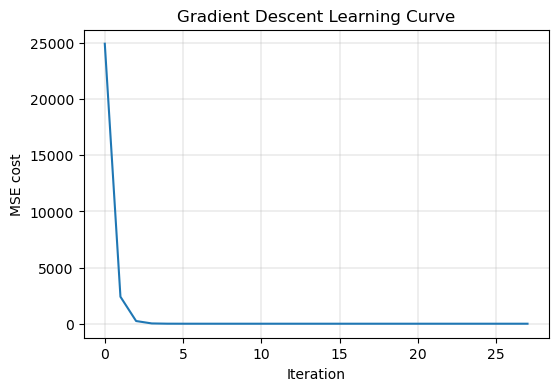

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(hist["cost"])
plt.xlabel("Iteration")
plt.ylabel("MSE cost")
plt.title("Gradient Descent Learning Curve")
plt.grid(True, linewidth=0.3)
plt.show()


### Problem 6. Do other cost functions work? (2 points)
Repeat the process in problems 4 and 5 with MAE, and then again - with the [Huber loss](https://en.wikipedia.org/wiki/Huber_loss). Both of them are less sensitive to outliers / anomalies than MSE); with the Huber loss function being specifically made for datasets with outliers.

Explain your findings. Is there a cost function that works much better? How about speed of training (measured in wall time)?

#### MAE (Mean Absolute Error)
**Cost**
$$
J_{\text{MAE}}(\beta)=\frac{1}{n}\sum_{i=1}^n |r_i|.
$$

**Subgradient** (vectorized)
$$
\partial J_{\text{MAE}}(\beta) \ni \frac{1}{n}(X')^\top s,\quad
s_i=\operatorname{sign}(r_i),\ \text{with } \operatorname{sign}(0)=0.
$$
> MAE is **non-smooth** (kink at 0), so we use a **subgradient** method. Convergence is usually slower than MSE.

#### Huber loss 

- parameter $\delta>0$

**Cost (per-residual)**
$$
\ell_\delta(r) =
\begin{cases}
\frac{1}{2}r^2, & |r|\le \delta,\\
\delta\big(|r|-\frac{1}{2}\delta\big), & |r|>\delta,
\end{cases}
\qquad
J_{\text{Huber}}(\beta)=\frac{1}{n}\sum_{i=1}^n \ell_\delta(r_i).
$$

**Gradient (vectorized)** with the **Huber score function**
$$
\psi_\delta(r_i)=
\begin{cases}
r_i, & |r_i|\le \delta,\\
\delta\,\operatorname{sign}(r_i), & |r_i|>\delta,
\end{cases}
\qquad
\nabla J_{\text{Huber}}(\beta)=\frac{1}{n}(X')^\top \psi_\delta(r).
$$
> Huber is **smooth near 0**, linear in the tails: robust to outliers, and usually **faster** than MAE.


In [31]:
# --- Common helpers (reuse from earlier tasks) ---
def augment_X_with_ones(X): return np.column_stack([np.ones(X.shape[0]), X])

class StandardScaler:
    def fit(self, X):
        self.mean_ = X.mean(axis=0)
        self.std_  = X.std(axis=0, ddof=0)
        self.std_[self.std_ == 0.0] = 1.0
        return self
    def transform(self, X): return (X - self.mean_) / self.std_
    def fit_transform(self, X): return self.fit(X).transform(X)

def safe_eta_from_lipschitz(X):
    """Safe step using L = (2/n) * sigma_max(X')^2 (like MSE upper bound).
    We'll scale down for MAE/Huber to be conservative."""
    X_aug = augment_X_with_ones(X)
    smax = np.linalg.svd(X_aug, compute_uv=False)[0]
    n = X.shape[0]
    L = (2.0 / n) * (smax**2)
    return 1.0 / (L + 1e-12)

# --- Losses and (sub)gradients ---
def cost_mae(X, beta, y):
    X_aug = augment_X_with_ones(X)
    r = X_aug @ beta - y
    return np.mean(np.abs(r))

def grad_mae(X, beta, y):
    X_aug = augment_X_with_ones(X)
    r = X_aug @ beta - y
    s = np.sign(r)            # subgradient; sign(0)=0
    return (X_aug.T @ s) / X.shape[0]

def cost_huber(X, beta, y, delta=1.0):
    X_aug = augment_X_with_ones(X)
    r = X_aug @ beta - y
    a = np.abs(r)
    quad = 0.5 * (r**2)
    lin  = delta * (a - 0.5 * delta)
    return np.mean(np.where(a <= delta, quad, lin))

def grad_huber(X, beta, y, delta=1.0):
    X_aug = augment_X_with_ones(X)
    r = X_aug @ beta - y
    a = np.abs(r)
    psi = np.where(a <= delta, r, delta * np.sign(r))
    return (X_aug.T @ psi) / X.shape[0]

# --- Generic GD driver (works for MAE/Huber, also MSE if you pass its cost/grad) ---
def gradient_descent_generic(
    X, y, cost_fn, grad_fn, *,
    eta=None, max_iters=20000, tol=1e-8, grad_tol=1e-6, patience=200,
    normalize=True, seed=0, grad_kwargs=None, cost_kwargs=None, eta_scale=1.0
):
    rng = np.random.default_rng(seed)
    grad_kwargs = grad_kwargs or {}
    cost_kwargs = cost_kwargs or {}

    # Optional standardization (recommended for stability)
    scaler = None
    X_work = X.copy()
    if normalize:
        scaler = StandardScaler()
        X_work = scaler.fit_transform(X_work)

    # Init
    beta = np.zeros(X_work.shape[1] + 1)

    # Learning rate
    if eta is None:
        eta = safe_eta_from_lipschitz(X_work) * eta_scale  # often need smaller steps vs MSE

    hist = {"cost": [], "grad_norm": [], "eta": eta}
    best_cost = np.inf; no_improve = 0; prev_cost = None
    t0 = perf_counter()
    for t in range(1, max_iters + 1):
        g = grad_fn(X_work, beta, y, **grad_kwargs)
        beta -= eta * g
        J = cost_fn(X_work, beta, y, **cost_kwargs)
        gnorm = np.linalg.norm(g)
        hist["cost"].append(J); hist["grad_norm"].append(gnorm)

        # Stopping: gradient small (works well for Huber; for MAE this is a subgradient)
        if gnorm < grad_tol:
            dt = perf_counter() - t0
            return beta, hist, {"iters": t, "converged": True, "reason": "grad_tol", "eta": eta, "time_s": dt}

        # Stopping: relative cost improvement with patience
        if prev_cost is not None:
            rel_drop = (prev_cost - J) / max(prev_cost, 1.0)
            if rel_drop < tol: no_improve += 1
            else: no_improve = 0
            if no_improve >= patience:
                dt = perf_counter() - t0
                return beta, hist, {"iters": t, "converged": True, "reason": "patience",
                                    "eta": eta, "time_s": dt}
        prev_cost = J

    dt = perf_counter() - t0
    return beta, hist, {"iters": max_iters, "converged": False, "reason": "max_iters", 
                        "eta": eta, "time_s": dt}

In [33]:
# Load your data
df = pd.read_csv("linear_regression_dataset.csv")
X = df.drop(columns=["y"]).to_numpy()
y = df["y"].to_numpy()

# (Optional) Inject outliers to test robustness:
# out_idx = np.random.default_rng(123).choice(len(y), size=5, replace=False)
# y[out_idx] += 800  # large positive outliers

# MAE: subgradient descent — smaller eta, looser grad_tol typically helps
beta_mae, hist_mae, info_mae = gradient_descent_generic(
    X, y, cost_mae, grad_mae,
    eta=None, eta_scale=0.25,     # shrink LR vs MSE heuristic
    max_iters=50000, tol=1e-9, grad_tol=5e-5, patience=1000,
    normalize=True
)

# Huber: choose delta relative to noise scale; try delta ≈ 1–2× RMSE(MSE) or use a robust scale
delta = 5.0
beta_hub, hist_hub, info_hub = gradient_descent_generic(
    X, y,
    lambda X_, b, y_: cost_huber(X_, b, y_, delta=delta),
    lambda X_, b, y_: grad_huber(X_, b, y_, delta=delta),
    eta=None, eta_scale=0.5,      # Huber tolerates larger steps than MAE
    max_iters=20000, tol=1e-9, grad_tol=1e-6, patience=500,
    normalize=True
)

print("MAE   -> Converged:", info_mae["converged"], "| Reason:", info_mae["reason"],
      "| Iters:", info_mae["iters"], "| Time (s):", round(info_mae["time_s"], 4),
      "| Final cost:", round(hist_mae["cost"][-1], 6))

print("Huber -> Converged:", info_hub["converged"], "| Reason:", info_hub["reason"],
      "| Iters:", info_hub["iters"], "| Time (s):", round(info_hub["time_s"], 4),
      "| Final cost:", round(hist_hub["cost"][-1], 6), "| delta:", delta)


MAE   -> Converged: False | Reason: max_iters | Iters: 50000 | Time (s): 4.8002 | Final cost: 3.572901
Huber -> Converged: True | Reason: grad_tol | Iters: 807 | Time (s): 0.1186 | Final cost: 9.140863 | delta: 5.0


### Problem 7. Experiment with the learning rate (1 point)
Use your favorite cost function. Run several "experiments" with different learning rates. Try really small, and really large values. Observe and document your findings.

### Problem 8. Generate some data for classification (1 point)
You'll need to create two clusters of points (one cluster for each class). I recomment using `scikit-learn`'s `make_blobs()` ([info](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)). Use as many features as you used in problem 1.

### Problem 9. Perform logistic regression (1 point)
Reuse the code you wrote in problems 3-7 as much as possible. If you wrote vectorized functions with variable parameters - you should find this easy. If not - it's not too late to go back and refactor your code.

The modelling function for logistic regression is
$$ \tilde{y} = \frac{1}{1+\exp{(-\sum_{i=1}^{m}a_i x_i + b)}}$$. Find a way to represent it using as much of your previous code as you can.

The most commonly used loss function is the [cross-entropy](https://en.wikipedia.org/wiki/Cross-entropy).

Experiment with different learning rates, basically repeating what you did in problem 7.

### * Problem 10. Continue experimenting and delving deep into ML
You just saw how modelling works and how to implement some code. Some of the things you can think about (and I recommend you pause and ponder on some of them are):
* Code: OOP can be your friend sometimes. `scikit-learn`'s models have `fit()`, `predict()` and `score()` methods.
* Data: What approaches work on non-generated data?
* Evaluation: How well do different models (and their "settings" - hyperparameters) actually work in practice? How do we evaluate a model in a meaningful way?
* Optimization - maths: Look at what `optimizers` (or solvers) are used in `scikit-learn` and why. Many "tricks" revolve around making the algorithm converge (finish) in fewer iterations, or making it more numerically stable.
* Optimization - code: Are there ways to make the code run fastr?